In [1]:
import numpy as np
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
# Let's code up a basic SGD for a very simple regression problem

In [3]:
t_c = [0.5, 14, 15, 28, 11, 8, 3, -4, 6, 13, 21]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [4]:
print(len(t_c), len(t_u))

11 11


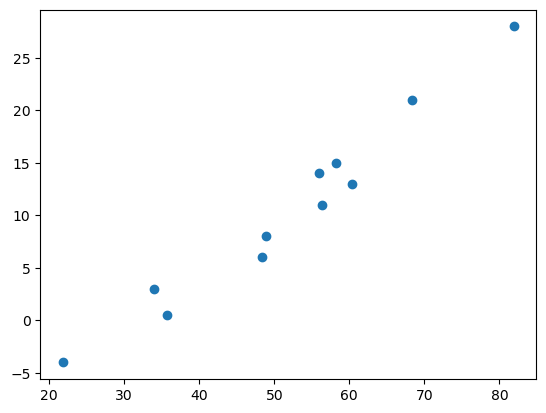

In [5]:
plt.scatter(t_u, t_c)
plt.show()

In [6]:
# convet the two lists to torch tensors

In [7]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [8]:
t_c.shape, t_u.shape

(torch.Size([11]), torch.Size([11]))

In [9]:
# we will fit a linear model

In [10]:
# define the model as follows

# t_u is x and t_u is y
# w, b wll be scalars

In [11]:
def model(t_u, w, b):
    return w*t_u + b

In [12]:
# also define a loss function - this would be the mse

def loss_mse(t_p, t_c):
    # t_P will be the predicted values
    squared_diff = (t_p - t_c)**2
    mse = squared_diff.mean()

    return mse

In [13]:
# let's initialize the two parameters of the model

In [14]:
w = torch.ones(())
b = torch.zeros(())

In [15]:
w, b

(tensor(1.), tensor(0.))

In [16]:
# get the predicted values with the current parameter values

In [17]:
t_predicted = model(t_u, w, b)

In [18]:
t_predicted

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [19]:
delta = 0.1
loss_rate_of_Change_w = (loss_mse(model(t_u, w + delta, b), t_c) - loss_mse(model(t_u, w - delta, b), t_c))/(2*delta)

In [20]:
loss_rate_of_Change_w

tensor(4517.2974)

In [21]:
learning_rate = 1e-2

In [22]:
w = w-learning_rate*loss_rate_of_Change_w

In [23]:
w

tensor(-44.1730)

In [24]:
loss_rate_of_Change_b = (loss_mse(model(t_u, w , b + delta), t_c) - loss_mse(model(t_u, w , b - delta), t_c))/(2*delta)

In [25]:
b = b-learning_rate*loss_rate_of_Change_b

In [26]:
b

tensor(46.)

In [27]:
loss_rate_of_Change_w = (loss_mse(model(t_u, w + delta, b), t_c) - loss_mse(model(t_u, w - delta, b), t_c))/(2*delta)

In [28]:
loss_rate_of_Change_w

tensor(-256402.5000)

In [29]:
loss_rate_of_Change_b = (loss_mse(model(t_u, w , b + delta), t_c) - loss_mse(model(t_u, w , b - delta), t_c))/(2*delta)

In [30]:
loss_rate_of_Change_b

tensor(-4510.)

In [31]:
w = w-learning_rate*loss_rate_of_Change_w

In [32]:
w

tensor(2519.8521)

In [33]:
b = b-learning_rate*loss_rate_of_Change_b

In [34]:
b

tensor(91.1000)